
# WeatherPy
---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
 


### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

 


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | saipan
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | aasiaat
Processing Record 5 of Set 1 | peniche
Processing Record 6 of Set 1 | mejit
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | broken hill
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | del rio
Processing Record 14 of Set 1 | mount isa
Processing Record 15 of Set 1 | ebon
Processing Record 16 of Set 1 | lazaro cardenas
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | champerico
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | sinabang
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | anadyr
Processing Record 23 o

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())



 

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64


In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,8.08,97,100,13.87,TF,1712253531
1,saipan,15.1355,145.7010,26.39,78,75,6.69,MP,1712253531
2,waitangi,-43.9535,-176.5597,14.90,97,100,2.24,NZ,1712253531
3,aasiaat,68.7098,-52.8699,-5.85,89,97,0.85,GL,1712253531
4,peniche,39.3558,-9.3811,18.38,80,100,7.81,PT,1712253531


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,8.08,97,100,13.87,TF,1712253531
1,saipan,15.1355,145.7010,26.39,78,75,6.69,MP,1712253531
2,waitangi,-43.9535,-176.5597,14.90,97,100,2.24,NZ,1712253531
3,aasiaat,68.7098,-52.8699,-5.85,89,97,0.85,GL,1712253531
4,peniche,39.3558,-9.3811,18.38,80,100,7.81,PT,1712253531


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

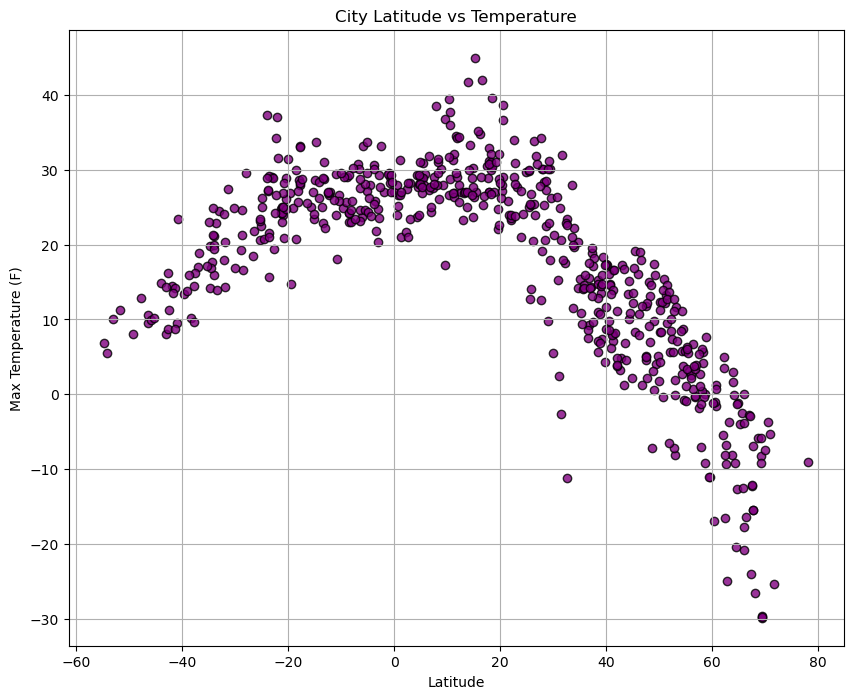

In [40]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1, color='purple')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

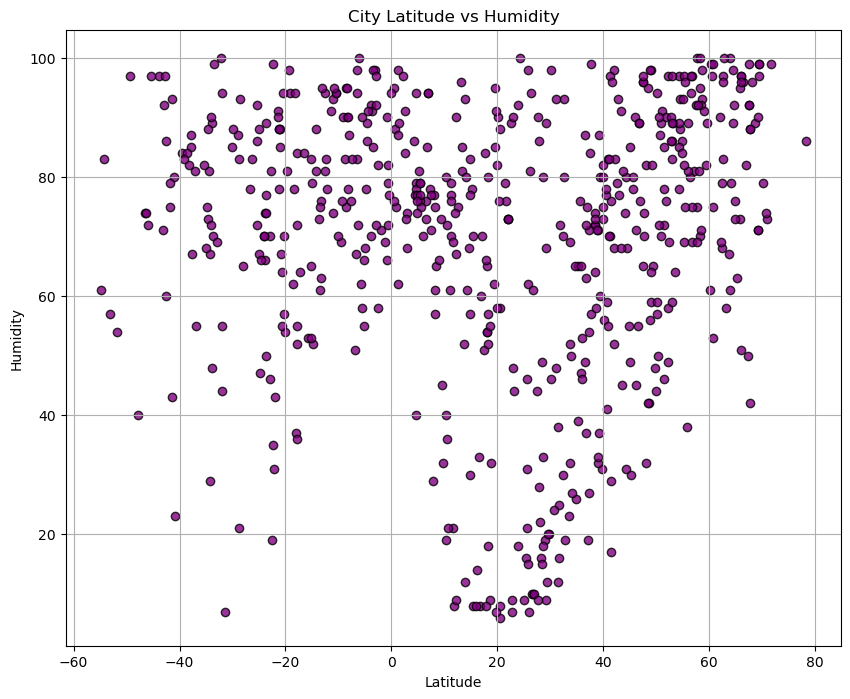

<Figure size 640x480 with 0 Axes>

In [41]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1, color='purple')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

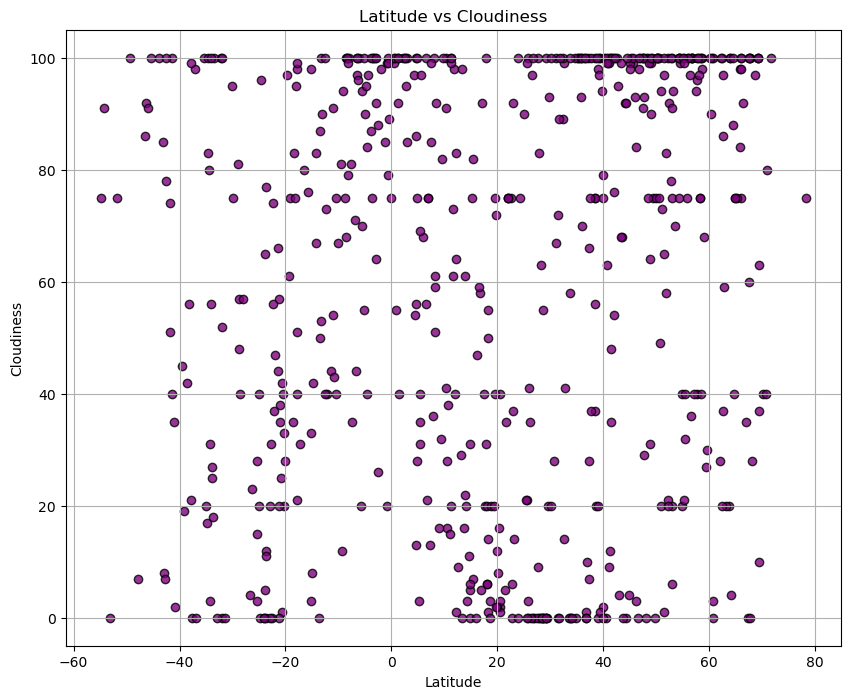

In [42]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1, color='purple')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

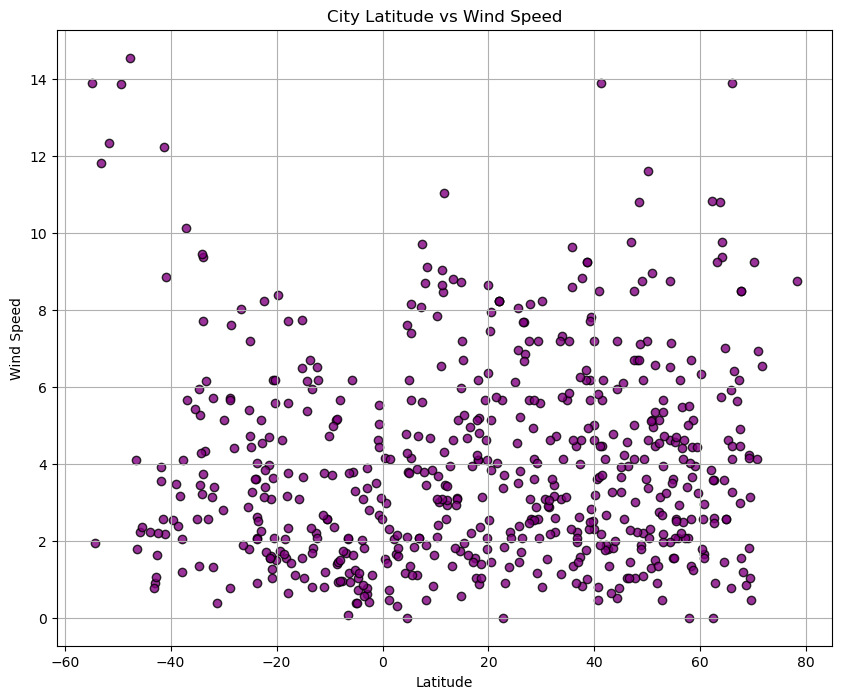

In [43]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1, color='purple')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def lineregress(x,y):
    slope, intercept, rvalue, p_value, std_err =linregress(x, y)   
    plt.plot(x, [intercept + slope*val for val in x], 'r')
    print(f"The R-squared is: {rvalue}")

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saipan,15.1355,145.7010,26.39,78,75,6.69,MP,1712253531
3,aasiaat,68.7098,-52.8699,-5.85,89,97,0.85,GL,1712253531
4,peniche,39.3558,-9.3811,18.38,80,100,7.81,PT,1712253531
5,mejit,10.2753,170.8646,26.70,80,100,7.84,MH,1712253531
6,albany,42.6001,-73.9662,3.19,79,100,1.79,US,1712253531


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,8.08,97,100,13.87,TF,1712253531
2,waitangi,-43.9535,-176.5597,14.90,97,100,2.24,NZ,1712253531
7,adamstown,-25.0660,-130.1015,22.55,67,40,4.72,PN,1712253531
8,edinburgh of the seven seas,-37.0676,-12.3116,17.07,81,98,10.13,SH,1712253531
9,grytviken,-54.2811,-36.5092,5.47,83,91,1.93,GS,1712253531


###  Temperature vs. Latitude Linear Regression Plot

The R-squared is: -0.873109326493396


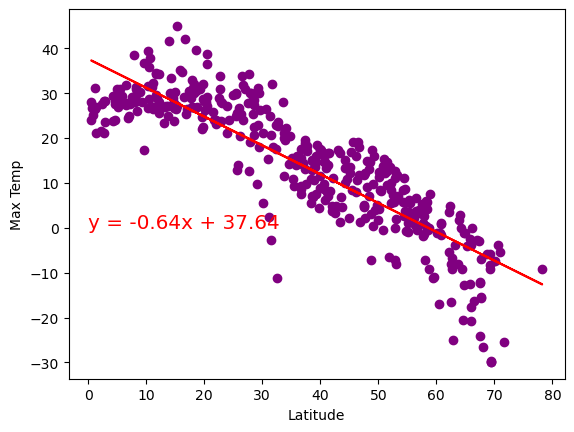

In [45]:
# Linear regression on Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], color='purple')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(0, 0, s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("north_max_temp.png")

The R-squared is: 0.757918084986309


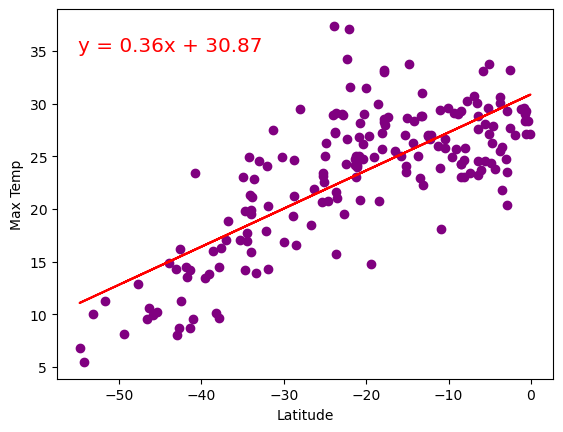

In [47]:
# Linear regression on Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], color='purple')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(-55,35,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("south_max_temp.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The R-squared is: 0.28777415223475244


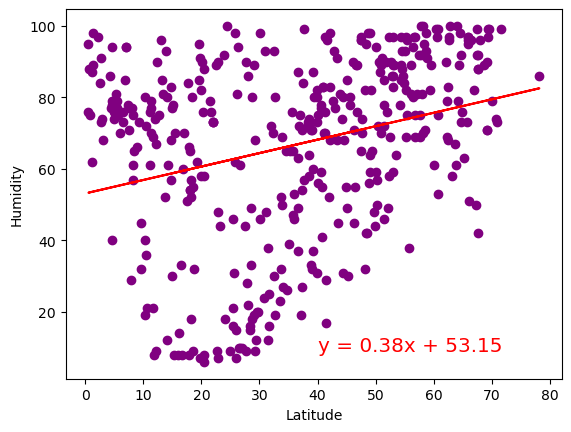

In [48]:
# Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], color='purple')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(40,9,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("north_humidity.png")

The R-squared is: 0.15396637576816302


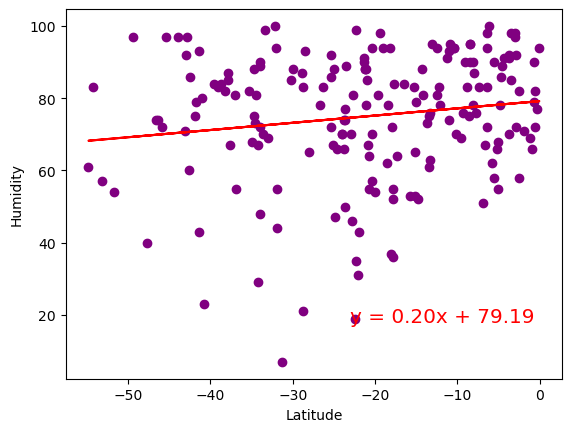

In [49]:
# Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], color='purple'
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(-23,18,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("south_humidity.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared is: 0.20761272112393275


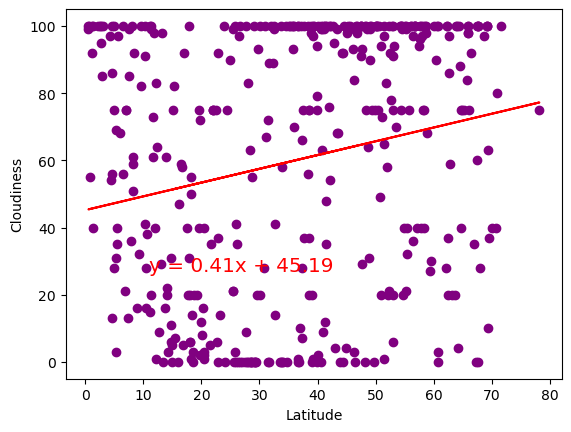

In [50]:
# Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], color='purple')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(11,27,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("north_cloudiness.png")

The R-squared is: 0.2476264366718983


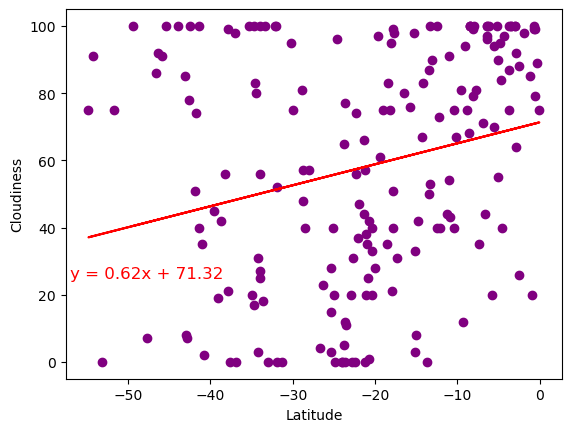

In [51]:
# Southern Hemisphere
# Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], color='purple')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(-57,25,s=f"y = {slope}x + {intercept}", c='r', size='large')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("south_cloudiness.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared is: 0.06416716441977113


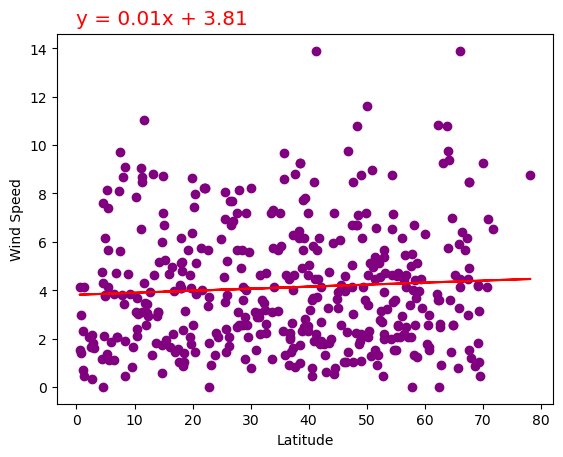

In [61]:
# Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], color='purple')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(0,15,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("north_wind_speed.png")

The R-squared is: -0.369656723112051


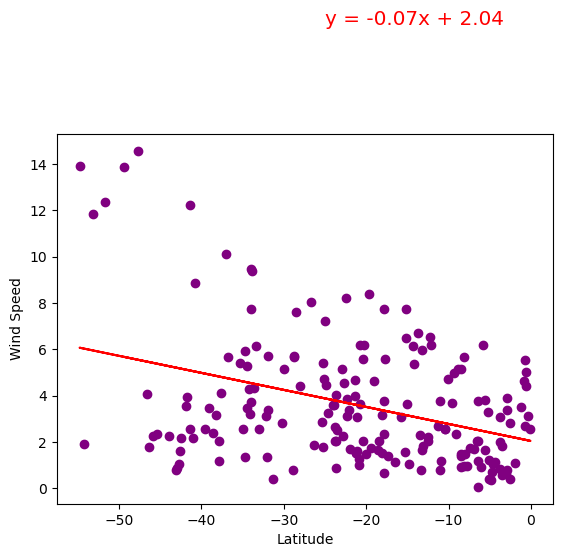

In [57]:
# Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], color='purple')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(-25,20,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("south_wind_speed.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE